In [1]:
setwd('/import/liujing/data2/')

In [2]:
# library(estimate)
# estimate <- function(dat,pro){
#   input.f=paste0(pro,'_estimate_input.txt')
#   output.f=paste0(pro,'_estimate_gene.gct')
#   output.ds=paste0(pro,'_estimate_score.gct')
#   write.table(dat,file = input.f,sep = '\t',quote = F)
#   library(estimate)
#   filterCommonGenes(input.f=input.f,
#                     output.f=output.f ,
#                     id="GeneSymbol")
#   estimateScore(input.ds = output.f,
#                 output.ds=output.ds,
#                 platform="illumina")   ## platform
#   scores=read.table(output.ds,skip = 2,header = T,check.names = F)
#   rownames(scores)=scores[,1]
#   scores=t(scores[,3:ncol(scores)])
#  library(stringr)
#   rownames(scores)=str_replace_all(rownames(scores),'[.]','-') # 这里TCGA样本名里面的-变成.了，进行恢复
#   write.csv(scores,file="Stromal_Immune_ESTIMATE.Score.csv") # 这一步是我增加的
#   return(scores)
# }

# pro='CHOL'
# scores=estimate(dat,pro)

In [3]:
data = read.csv('Stromal_Immune_ESTIMATE.Score.csv',row.names = 1)

In [4]:
load('ss.rda')

In [5]:
phenotype_file = data.frame(Group = group)

In [6]:
merge_matrix <- cbind(phenotype_file,data)

In [7]:
my_comparisons <- list( c("subtype1", "subtype2")) 

In [12]:
merge_matrix = merge_matrix[,c('Group','ImmuneScore')]

In [14]:
merge_matrix[,2] = log2(merge_matrix[,2]  + 1)

In [23]:
tail(merge_matrix,3)

,Group,ImmuneScore
,<chr>,<dbl>
CI7,subtype1,12.02441
CI8,subtype2,12.06651
CI9,subtype2,12.07278


In [24]:
max_labely <- max(merge_matrix[,"ImmuneScore"])
min_labely <- min(merge_matrix[,"ImmuneScore"])

In [25]:
my_labely <- c(max_labely+0.5, max_labely+1, max_labely+0.5, max_labely+1)

In [26]:
library(ggpubr)
library(ggplot2)

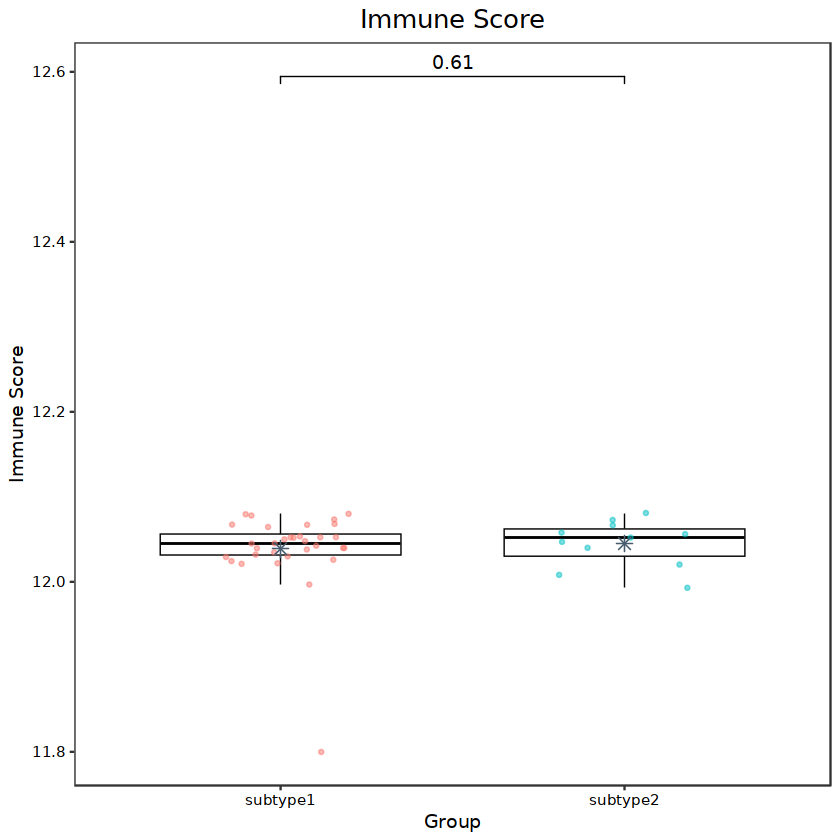

In [27]:
ggboxplot(merge_matrix, x = "Group", y = "ImmuneScore",
        color = "black",alpha = 0.8,size=.3,
         add = "jitter",
        add.params = list(color = "Group",alpha = .5,size = 0.8)) +stat_compare_means(comparisons = my_comparisons,method = "t.test",
                   label.y = my_labely,na.rm=TRUE)+
      stat_summary(fun.y = "mean",
                geom = "point",
                color = "#485c70",
                shape = 8,
                size = 3) + ggtitle("Immune Score") +theme_bw()+
theme(legend.position="none",
       plot.title = element_text(size=15,face="bold",hjust = 0.5),
       axis.text.x=element_text(colour="black"),
       axis.text.y=element_text(colour="black"),
panel.grid.major = element_blank(),
          panel.grid.minor = element_blank()) + ylab("Immune Score") +
xlab("Group") 